<a href="https://colab.research.google.com/github/purin96/Data-Science-Projects-2024/blob/main/pima_classification_baseline_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
pwd

'/content'

In [18]:
df=pd.read_csv("./sample_data/diabetes.csv")
df.shape

(768, 9)

In [20]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
split_count=int(df.shape[0]*0.8)
split_count

614

In [33]:
train = df[:split_count].copy()
train.shape

(614, 9)

In [36]:
test = df[split_count:].copy()
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
614,11,138,74,26,144,36.1,0.557,50,1
615,3,106,72,0,0,25.8,0.207,27,0
616,6,117,96,0,0,28.7,0.157,30,0
617,2,68,62,13,15,20.1,0.257,23,0
618,9,112,82,24,0,28.2,1.282,50,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [42]:
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [45]:
label_name = train.columns[-1]
label_name

'Outcome'

In [62]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [60]:
y_train= train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [66]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [71]:
y_test= test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

In [77]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model

In [81]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [86]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1])

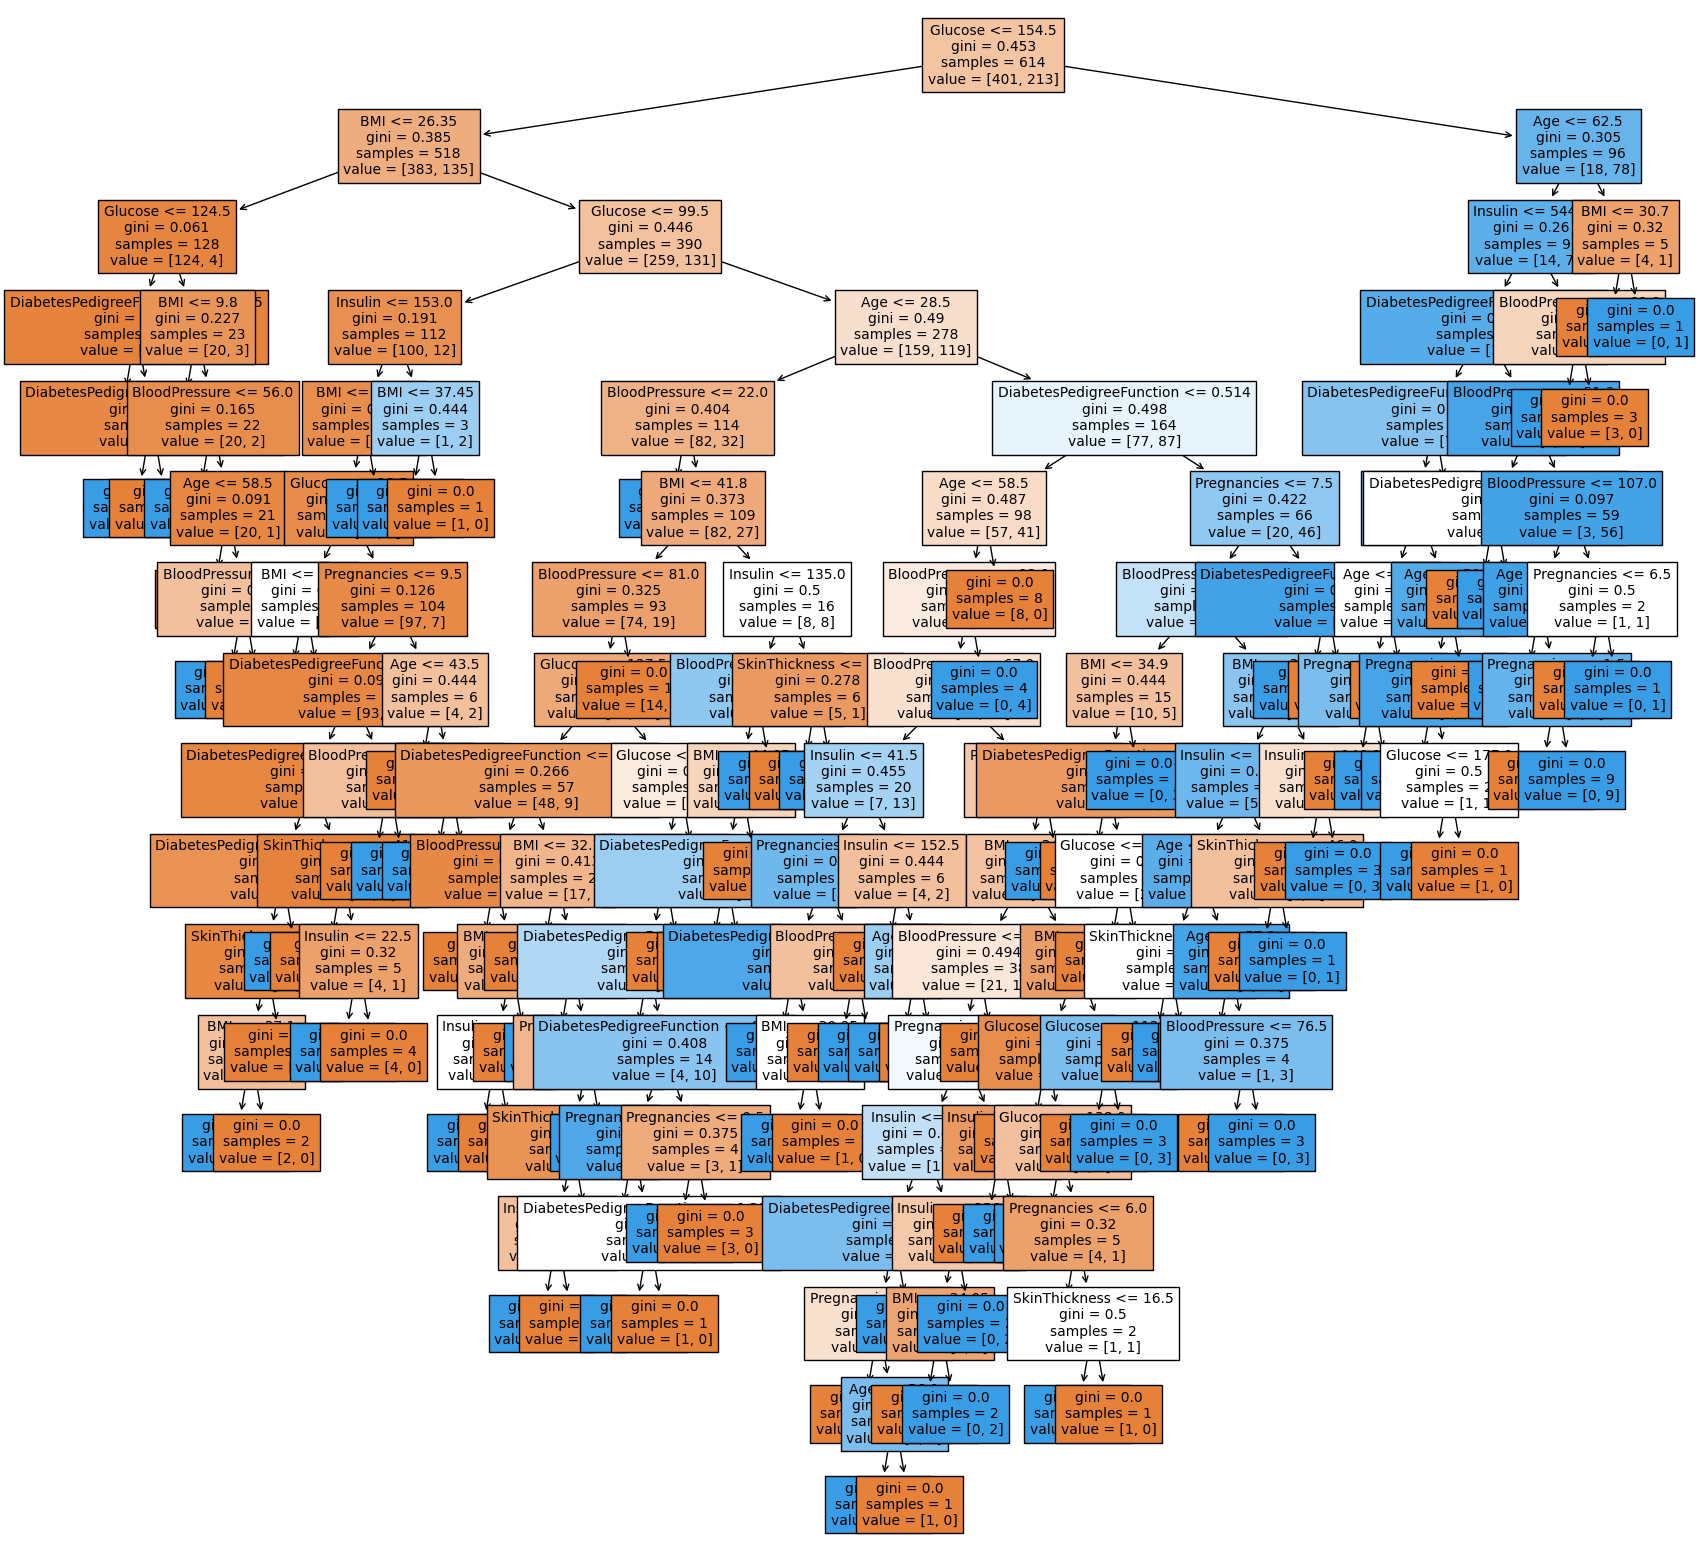

In [91]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
tree = plot_tree(model,
         feature_names=feature_names,
                 filled=True, fontsize=10)

In [92]:
model.feature_importances_

array([0.08452479, 0.28439306, 0.11055736, 0.02648211, 0.09347316,
       0.18951916, 0.11465775, 0.0963926 ])

<Axes: >

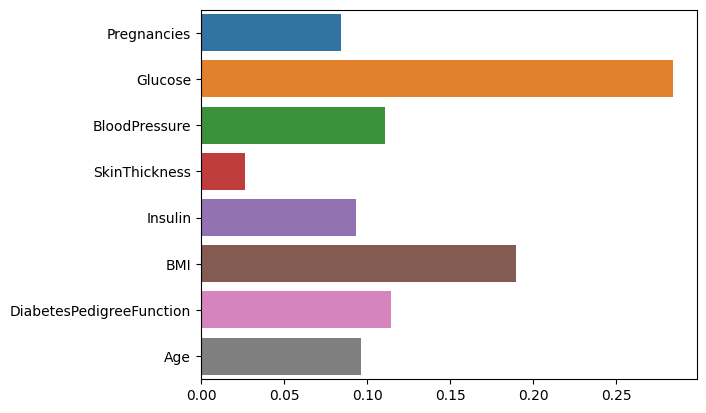

In [96]:
sns.barplot(x=model.feature_importances_,y=feature_names)

In [105]:
diff_count = abs(y_test -y_predict).sum()
diff_count

44

In [109]:
(len(y_test) - diff_count) /len(y_test) * 100

71.42857142857143

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)*100

71.42857142857143

In [117]:
model.score(X_test,y_test) *100

71.42857142857143